In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
heart=pd.read_csv("heart.csv")

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


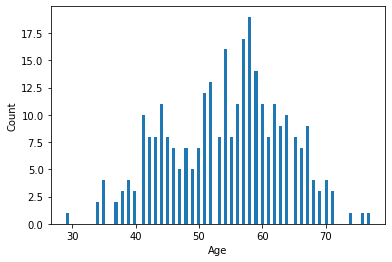

In [6]:
plt.hist(heart.age,bins=100,rwidth=1)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### People of age 55-60 yrs has max chances of heart disease ###

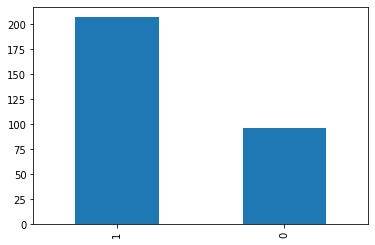

In [7]:
heart["sex"].value_counts().plot(kind='bar')
plt.show()

### Males have more chances of getting heart disease ###

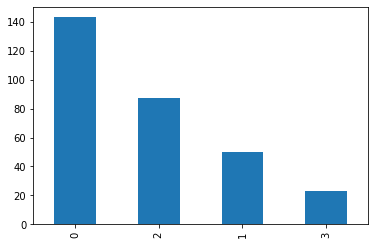

In [8]:
heart["cp"].value_counts().plot(kind='bar')
plt.show()

### Most people doesnt have chest pain ###

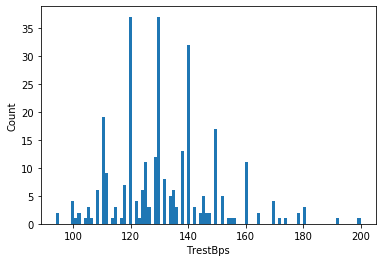

In [9]:
plt.hist(heart.trestbps,bins=100,rwidth=1)
plt.xlabel("TrestBps")
plt.ylabel("Count")
plt.show()

### 

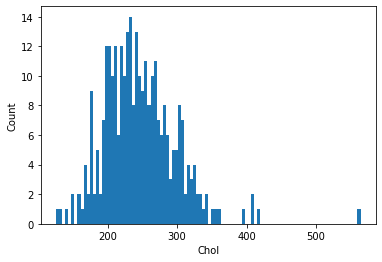

In [10]:
plt.hist(heart.chol,bins=100,rwidth=1)
plt.xlabel("Chol")
plt.ylabel("Count")
plt.show()

### 

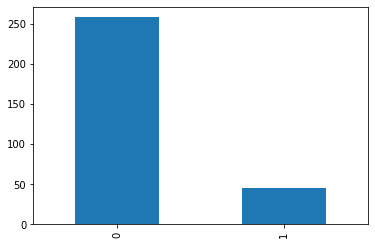

In [11]:
heart["fbs"].value_counts().plot(kind='bar')
plt.show()

### 

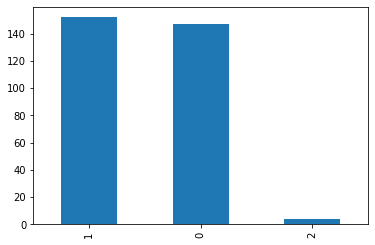

In [12]:
heart["restecg"].value_counts().plot(kind='bar')
plt.show()

### 

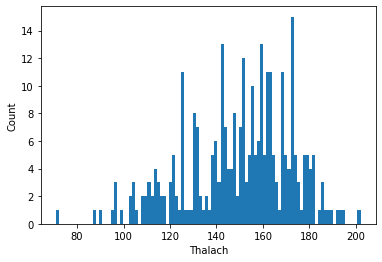

In [13]:
plt.hist(heart.thalach,bins=100,rwidth=1)
plt.xlabel("Thalach")
plt.ylabel("Count")
plt.show()

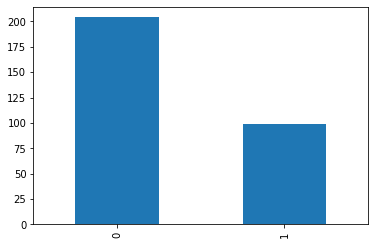

In [14]:
heart["exang"].value_counts().plot(kind='bar')
plt.show()

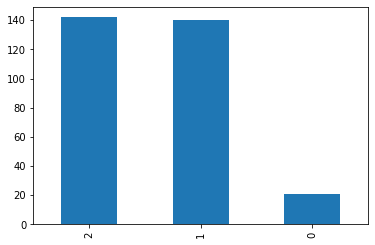

In [15]:
heart["slope"].value_counts().plot(kind='bar')
plt.show()

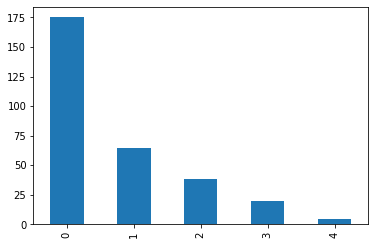

In [16]:
heart["ca"].value_counts().plot(kind='bar')
plt.show()

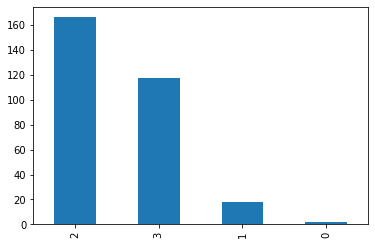

In [17]:
heart["thal"].value_counts().plot(kind='bar')
plt.show()

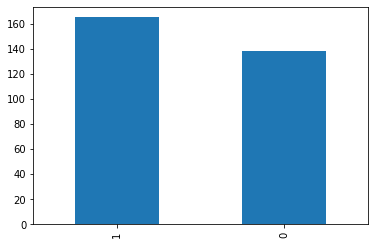

In [18]:
heart["target"].value_counts().plot(kind='bar')
plt.show()

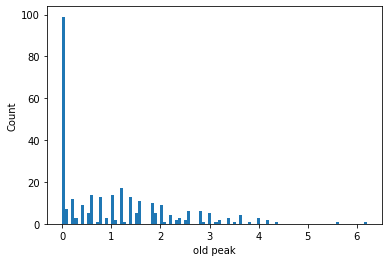

In [19]:
plt.hist(heart.oldpeak,bins=100,rwidth=1)
plt.xlabel("old peak")
plt.ylabel("Count")
plt.show()

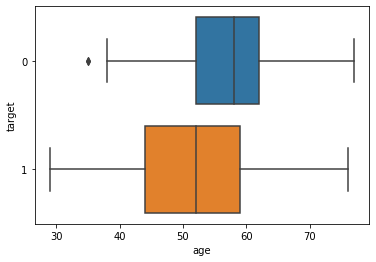

In [20]:
sns.boxplot(y=heart.target,x=heart.age,orient='h')
plt.show()

### People of age 50-55 yrs are more likely to get heart disease ###

In [21]:
pd.crosstab(heart["target"],heart["sex"],margins=True)

sex,0,1,All
target,,,
0,24,114,138
1,72,93,165
All,96,207,303


### Most men have heart disease ###

In [22]:
pd.crosstab(heart["target"],heart["cp"],margins=True)

cp,0,1,2,3,All
target,,,,,
0,104,9,18,7,138
1,39,41,69,16,165
All,143,50,87,23,303


### People with moderate chest pain are more likely to have heart disease ###

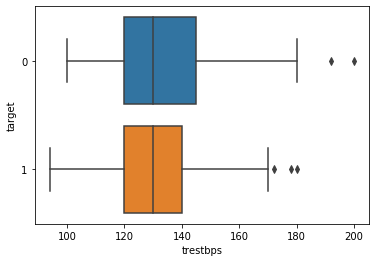

In [23]:
sns.boxplot(x=heart.trestbps,y=heart.target,orient='h')
plt.show()

### 

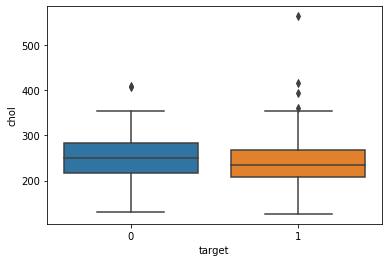

In [24]:
sns.boxplot(y=heart.chol,x=heart.target)
plt.show()

In [25]:
pd.crosstab(heart["target"],heart["fbs"],margins=True)

fbs,0,1,All
target,,,
0,116,22,138
1,142,23,165
All,258,45,303


### People with blood sugar less than 120 are more likely to get heart disease ###

In [26]:
pd.crosstab(heart["target"],heart["restecg"],margins=True)

restecg,0,1,2,All
target,,,,
0,79,56,3,138
1,68,96,1,165
All,147,152,4,303


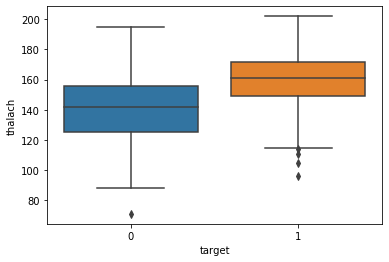

In [27]:
sns.boxplot(y=heart.thalach,x=heart.target)
plt.show()

### People with more than 160 thalach are more likely to have heart disease ###

In [28]:
pd.crosstab(heart["target"],heart["exang"],margins=True)

exang,0,1,All
target,,,
0,62,76,138
1,142,23,165
All,204,99,303


### People with no exang are more likely to have heart disease ###

In [29]:
pd.crosstab(heart["target"],heart["slope"],margins=True)

slope,0,1,2,All
target,,,,
0,12,91,35,138
1,9,49,107,165
All,21,140,142,303


### Higher the slope , higher the chance of getting heart disease ###

In [30]:
pd.crosstab(heart["target"],heart["ca"],margins=True)

ca,0,1,2,3,4,All
target,,,,,,
0,45,44,31,17,1,138
1,130,21,7,3,4,165
All,175,65,38,20,5,303


In [31]:
### 

In [32]:
pd.crosstab(heart["target"],heart["thal"],margins=True)

thal,0,1,2,3,All
target,,,,,
0,1,12,36,89,138
1,1,6,130,28,165
All,2,18,166,117,303


### People with normal thal are more likely to get heart disease ###

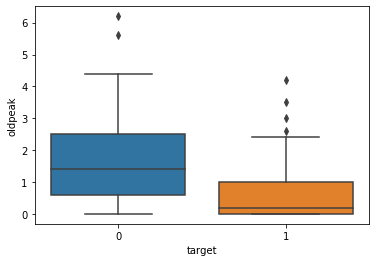

In [33]:
sns.boxplot(y=heart.oldpeak,x=heart.target)
plt.show()

In [34]:
y = heart["target"]
x= heart.drop("target",axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                    test_size=0.2,random_state=1)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
ypred  = logreg.predict(x_test)
from sklearn import metrics
metrics.log_loss(y_test,ypred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


8.493272817999383

In [36]:
print(metrics.accuracy_score(y_test,ypred))

0.7540983606557377


In [37]:
y = heart["target"]
x = heart.drop(["target"],axis=1)
from sklearn import metrics
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                    test_size=0.2,random_state=1)
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=75)
knn_model.fit(x_train,y_train)
ypred_knn=knn_model.predict(x_test)

In [38]:
print(metrics.accuracy_score(y_test,ypred_knn))

0.5901639344262295


In [39]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=15)
dt.fit(x_train,y_train)
ypred_dt=dt.predict(x_test)

In [40]:
print(metrics.accuracy_score(y_test,ypred_dt))

0.7704918032786885


In [41]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=50)
forest.fit(x_train,y_train)
ypred_forest=forest.predict(x_test)
print(metrics.accuracy_score(y_test,ypred_forest))

0.7540983606557377


In [42]:
from sklearn.svm import LinearSVC
sv_model=LinearSVC(random_state=1)
sv_model.fit(x_train,y_train)
y_predsvm=sv_model.predict(x_test)
metrics.accuracy_score(y_test,y_predsvm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7213114754098361

In [43]:
from sklearn.svm import SVC
sv_model2=SVC(random_state=1,C=5,gamma=0.8)
sv_model2.fit(x_train,y_train)
y_predsvm2=sv_model2.predict(x_test)
print(metrics.accuracy_score(y_test,y_predsvm2))

0.5081967213114754


In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                   test_size=0.2,random_state=1)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
clf = GaussianNB()
clf.fit(x_train, y_train)
ypred = clf.predict(x_test)
metrics.accuracy_score(ypred,y_test)

0.7704918032786885

In [47]:
?GaussianNB

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
parameters = {"var_smoothing":[0.001,0.005,0.008,0.0009,0.00008,0.00007]}
clf = GaussianNB()
gsearch = GridSearchCV(clf, parameters)
gsearch.fit(x_train, y_train)
model = gsearch.best_estimator_
ypred=model.predict(x_test)
metrics.accuracy_score(ypred,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8852459016393442